# Correr experimentos
En este archivo está el código para correr los experimentos y escribir los resultados en archivos CSV.
> Los archivos se guardan en la carpeta _resultados_.

In [65]:
import math, subprocess
import pandas as pd
import numpy as np
from IPython.display import display, clear_output
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


A continuación leemos los datasets en dataframes de Pandas.

In [4]:
def leer_instancia(path_instancia):
    with open(path_instancia, "r") as f:
        return f.read();

La siguiente función sirve para correr el código sobre una instancia ejecutando un método en particular.

- **VMC** : vecino mas cercano
- **AGM** : arbol generador minimo
- **I** : incersion
- **tabu falta** : tabu

In [5]:
def correr_experimento(metodo, archivo_instancia,parametros_tabu):
    # Leer archivo de la instancia.
    instancia = leer_instancia(archivo_instancia)
    
    cmds = ["../tp2", metodo] + parametros_tabu
    # Crear proceso para ejecutar el codigo.
    process = subprocess.Popen(cmds , stderr=subprocess.PIPE, stdout=subprocess.PIPE, stdin=subprocess.PIPE, universal_newlines = True)

    # Poner la instancia en la entrada estandar.
    process.stdin.write(instancia)
    process.stdin.flush()

    # Correr experimento.
    exit_code = process.wait()

    # Verificar que el proceso no fallo.
    if exit_code != 0: raise(f"Hubo un error en la experimentacion para el algoritmo: {metodo} con la instancia {archivo_instancia}.")
    # Leer salida de STDERR con los tiempos de ejecucion de cada metodo.
    tiempo_de_ejecucion = float(process.stderr.read());
    costo = process.stdout.read() 
    #print(process.stdout.read()) # resultado del metodo
    process.stdin.close();
    process.stdout.close();
    process.stderr.close();
    costo = costo.split(" ")[1]
    costo = costo.split("\n")[0]
    res = (tiempo_de_ejecucion,float(costo))
    
    return res;




## Corremos los experimentos
Vamos a guardar una tabla con las ejecuciones y sus respectivos tiempos.

In [6]:
experimentos = [];
experimentos

[]

In [7]:
# n : cantidad de vertices del grafo
#Inicios: todos los v de cada arista v->w
#Destinos: todos los w de cada arista v->w
#Pesos: todos los pesos de cada arista v->w

def save_instance(dataset, instance_name,n, Inicios,Destinos, Pesos):
    with open(F"{dataset}/{instance_name}.txt", "w") as f:
        
        print(n, len(Inicios), file=f)

        for i in range(len(Pesos)): 
            print(Inicios[i], file=f, end=" ")
            print(Destinos[i], file=f, end=" ")
            print(Pesos[i], file=f)
            

def save_index(dataset, instances):
    with open(F"instancias/{dataset}/instances.txt", "w") as f:
        for instance in instances: 
            print(instance, file=f)

In [25]:
def gen_vmc(n,pesocierre =100):
    Inicios = []
    Destinos = []
    Pesos= []
    #CHEQUEAR INDICES i J
    for i in range(1,n+1):
        for j in range(i+1,n+1):
            Inicios.append(i)
            Destinos.append(j)
            if(i == 1 and j==n):
                Pesos.append(pesocierre)
            else:
                Pesos.append(1)

    return Inicios,Destinos,Pesos

In [73]:
archivos_instancia= []
parametros = []
for pesocierre in [10,100,1000]:
    
    for n in range(5,55,5):

        Inicios,Destinos,Pesos = gen_vmc(n,pesocierre)
        dataset = "instancias_exp_vmc"
        instance_name = f"vmc_{n}_{pesocierre}"    
        save_instance(dataset, instance_name,n, Inicios,Destinos, Pesos)
        archivos_instancia.append(F"{dataset}/{instance_name}.txt")
        
        parametros.append((n,pesocierre))

In [74]:
archivos_instancia

['instancias_exp_vmc/vmc_5_10.txt',
 'instancias_exp_vmc/vmc_10_10.txt',
 'instancias_exp_vmc/vmc_15_10.txt',
 'instancias_exp_vmc/vmc_20_10.txt',
 'instancias_exp_vmc/vmc_25_10.txt',
 'instancias_exp_vmc/vmc_30_10.txt',
 'instancias_exp_vmc/vmc_35_10.txt',
 'instancias_exp_vmc/vmc_40_10.txt',
 'instancias_exp_vmc/vmc_45_10.txt',
 'instancias_exp_vmc/vmc_50_10.txt',
 'instancias_exp_vmc/vmc_5_100.txt',
 'instancias_exp_vmc/vmc_10_100.txt',
 'instancias_exp_vmc/vmc_15_100.txt',
 'instancias_exp_vmc/vmc_20_100.txt',
 'instancias_exp_vmc/vmc_25_100.txt',
 'instancias_exp_vmc/vmc_30_100.txt',
 'instancias_exp_vmc/vmc_35_100.txt',
 'instancias_exp_vmc/vmc_40_100.txt',
 'instancias_exp_vmc/vmc_45_100.txt',
 'instancias_exp_vmc/vmc_50_100.txt',
 'instancias_exp_vmc/vmc_5_1000.txt',
 'instancias_exp_vmc/vmc_10_1000.txt',
 'instancias_exp_vmc/vmc_15_1000.txt',
 'instancias_exp_vmc/vmc_20_1000.txt',
 'instancias_exp_vmc/vmc_25_1000.txt',
 'instancias_exp_vmc/vmc_30_1000.txt',
 'instancias_exp_vm

In [75]:
experimentos = []
i = 0
for i in range(len(parametros)):
    n = parametros[i][0]
    p = parametros[i][1]
    experimentos.append(["vmc_exp", n,"VMC", archivos_instancia[i] ,[str(0),str(0),str(0),str(0)],p]);
    i+=1

## CORRER EXPERIMENTOS

In [76]:
columnas = ["dataset", "n", "metodo", "tiempo","costo","largolista","max_iter","rang_iter","percentage","peso_cierre","optimo"];

filas = [];
numero = 1
T = 5 # Numero de veces que se ejecuta cada experimento (para mayor fidelidad del tiempo).
for experimento in experimentos:
    # Voy mostrando que experimento se esta ejecutando.
    clear_output(wait=True)
    display('Experimento: ' + str(numero) + "/" + str(len(experimentos)))
    numero += 1
    
    # Ejecutamos el experimento T veces y obtenemos la mediana.
    tiempos = []
    costos = []
    resultados = []
    for i in range(0, T):
        exp = correr_experimento(experimento[2], experimento[3],experimento[4])
        t = exp[0]
        c = exp[1]
        costos.append(c)
        tiempos.append(t);
    costo = np.median(costos)
    tiempo = np.median(tiempos);
    filas.append([experimento[0], experimento[1], experimento[2], tiempo,costo,
                  experimento[4][0],experimento[4][1],experimento[4][2],experimento[4][3],experimento[5],experimento[1]]);
print('fin :)')

'Experimento: 30/30'

fin :)


In [77]:
df_resultados = pd.DataFrame(filas, columns=columnas);

#df_resultados.to_csv("resultados/resultado.csv", index=False, header=True);

In [78]:
print("VMC")
df_resultados


VMC


,dataset,n,metodo,tiempo,costo,largolista,max_iter,rang_iter,percentage,peso_cierre,optimo
0,vmc_exp,5,VMC,0.006210,14.0,0,0,0,0,10,5
1,vmc_exp,10,VMC,0.009831,19.0,0,0,0,0,10,10
2,vmc_exp,15,VMC,0.010707,24.0,0,0,0,0,10,15
3,vmc_exp,20,VMC,0.016334,29.0,0,0,0,0,10,20
4,vmc_exp,25,VMC,0.022241,34.0,0,0,0,0,10,25
5,vmc_exp,30,VMC,0.029147,39.0,0,0,0,0,10,30
6,vmc_exp,35,VMC,0.036790,44.0,0,0,0,0,10,35
7,vmc_exp,40,VMC,0.045979,49.0,0,0,0,0,10,40
8,vmc_exp,45,VMC,0.055688,54.0,0,0,0,0,10,45
9,vmc_exp,50,VMC,0.067831,59.0,0,0,0,0,10,50


In [60]:
df_resultados["peso_cierre"].unique()

array([  10,  100, 1000])

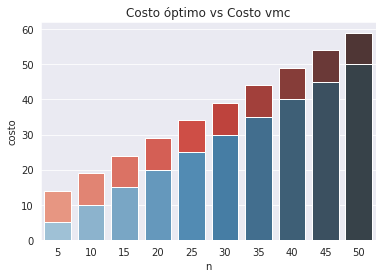

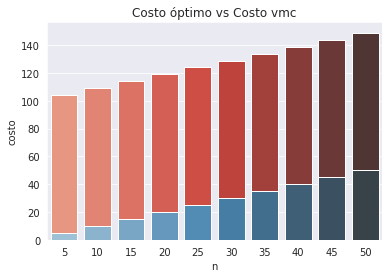

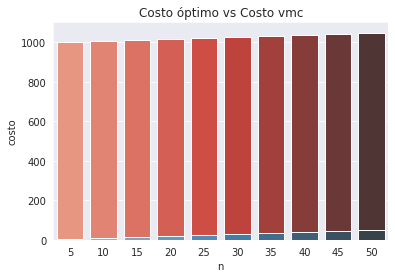

In [98]:
PesosCierre = df_resultados["peso_cierre"].unique()
for p in PesosCierre:
    sns.set_style("darkgrid")
    fig = sns.barplot(data = df_resultados[df_resultados["peso_cierre"] == p], x = "n",y ="costo",palette="Reds_d")
    fig2 = sns.barplot(data = df_resultados[df_resultados["peso_cierre"] == p], x = "n",y ="optimo",palette="Blues_d")
    plt.title("Costo óptimo vs Costo vmc")

    plt.ylabel("costo")
    plt.savefig(f"graficos/exp-vmc{p}.svg")
    plt.show()